In [7]:
import numpy as np
import pandas as pd
from sklearn import datasets
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
iris= datasets.load_iris()

In [8]:
Iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

X = Iris.iloc[:, :-1].values
Y = Iris.iloc[:, -1].values.reshape(-1,1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=41)

In [9]:
#SVM implementation

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

svcclassifier_lin = SVC(kernel = 'linear', random_state = 0)
svcclassifier_lin.fit(X_train, Y_train)

Y_pred = svcclassifier_lin.predict(X_test)

#y_compare = np.vstack((Y_test,Y_pred)).T
cm = confusion_matrix(Y_test, Y_pred)

a = cm.shape
corrPred = 0
falsePred = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corrPred +=cm[row,c]
        else:
            falsePred += cm[row,c]
print('Correct predictions: ', corrPred)
print('False predictions', falsePred)
kernelLinearAccuracy = corrPred/(cm.sum())
print ('Accuracy of the SVC Clasification is: ', corrPred/(cm.sum()))

Correct predictions:  27
False predictions 3
Accuracy of the SVC Clasification is:  0.9


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


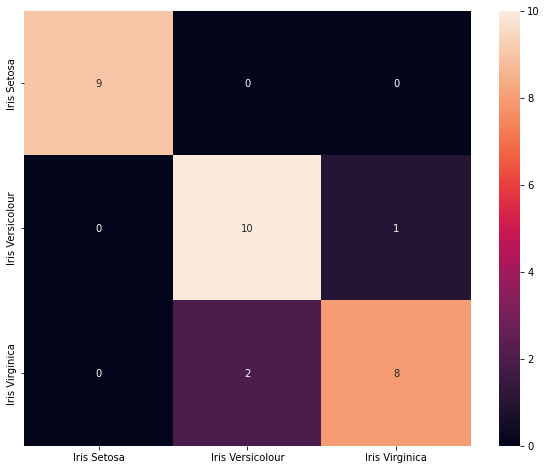

In [10]:
df_cm = pd.DataFrame(cm,['Iris Setosa','Iris Versicolour','Iris Virginica'],['Iris Setosa','Iris Versicolour','Iris Virginica'])
plt.figure(figsize = (10,8))
sns.heatmap(df_cm, annot=True)

true = np.diag(cm)

In [11]:
svcclassifier_poly = SVC(kernel = 'poly', random_state = 0)
svcclassifier_poly.fit(X_train, Y_train)

Y_pred = svcclassifier_poly.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

#finding accuracy from the confusion matrix.
a = cm.shape
corrPred = 0
falsePred = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corrPred +=cm[row,c]
        else:
            falsePred += cm[row,c]
print('Correct predictions: ', corrPred)
print('False predictions', falsePred)
kernelPolyAccuracy = corrPred/(cm.sum())
print ('Accuracy of the SVC Clasification is: ', corrPred/(cm.sum()))

[[ 9  0  0]
 [ 0 11  0]
 [ 0  4  6]]
Correct predictions:  26
False predictions 4
Accuracy of the SVC Clasification is:  0.8666666666666667


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


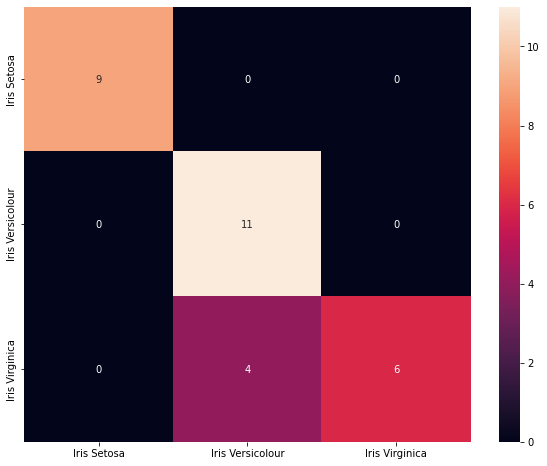

In [12]:
df_cm = pd.DataFrame(cm,['Iris Setosa','Iris Versicolour','Iris Virginica'],['Iris Setosa','Iris Versicolour','Iris Virginica'])
plt.figure(figsize = (10,8))
sns.heatmap(df_cm, annot=True)

true = np.diag(cm)

In [13]:
svcclassifier_RBF = SVC(kernel = 'rbf', random_state = 0)
svcclassifier_RBF.fit(X_train, Y_train)

Y_pred = svcclassifier_RBF.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

#finding accuracy from the confusion matrix.
a = cm.shape
corrPred = 0
falsePred = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corrPred +=cm[row,c]
        else:
            falsePred += cm[row,c]
print('Correct predictions: ', corrPred)
print('False predictions', falsePred)
kernelRbfAccuracy = corrPred/(cm.sum())
print ('Accuracy of the SVC Clasification is: ', corrPred/(cm.sum()))

[[ 9  0  0]
 [ 0 10  1]
 [ 0  2  8]]
Correct predictions:  27
False predictions 3
Accuracy of the SVC Clasification is:  0.9


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


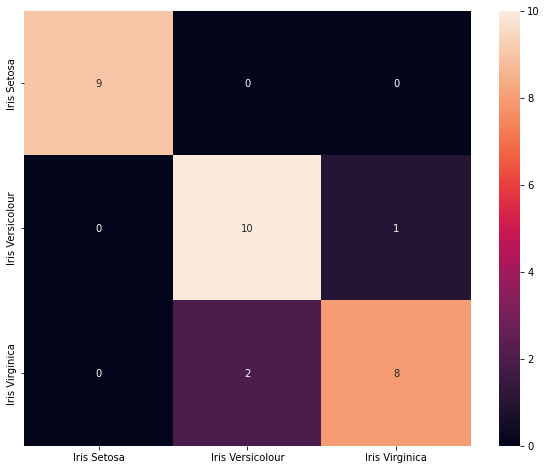

In [14]:
df_cm = pd.DataFrame(cm,['Iris Setosa','Iris Versicolour','Iris Virginica'],['Iris Setosa','Iris Versicolour','Iris Virginica'])
plt.figure(figsize = (10,8))
sns.heatmap(df_cm, annot=True)

true = np.diag(cm)

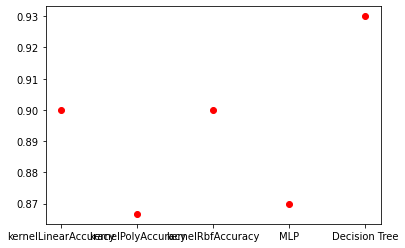

In [17]:
plt.plot(['kernelLinearAccuracy','kernelPolyAccuracy','kernelRbfAccuracy','MLP','Decision Tree'],[kernelLinearAccuracy,kernelPolyAccuracy,kernelRbfAccuracy,0.87,0.93],'ro')